<a href="https://colab.research.google.com/github/Jorge-Alvarez-23/Data-Science-II_Coder/blob/main/Proy_PreEntrega_Alvarez%20Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problematica

El mercado de computadoras se caracteriza por su gran variedad de marcas y especificaciones técnicas, que en conjunto, determinan el valor final de los dispositivos. Tanto para vendedores como para compradores, es crucial entender qué factores tienen un mayor impacto en el precio para tomar decisiones acertadas. Factores como el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica y el sistema operativo juegan un papel importante en la valoración de una computadora. Este análisis tiene como finalidad identificar las características que más afectan el precio final.


# 2- Objetivo

### 2.A Objetivo Principal

¿Qué características las computadoras tienen mayor incidencia en el precio?

Determinar como influyen en la variación de precios de las computadoras, las especificaciones técnicas, como ser, el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica, además de aspectos como la marca y el sistema operativo entre otros. Este análisis tiene como finalidad identificar las características que más afectan el precio final.

### 2-B Objetivo Secundario

1. ¿Como impacta la Generacion del Procesador y Velocidad del Procesado en el precio de las computadoras de diferentes marcas ?


2. ¿Como impacta la posibilidad de Memoria Expandible y la Generación del Procesado en el precio de las computadoras

# 3- DataSet


### Fuente

El dataset utilizado para este proyecto fue descargado del siguiente sitio:

[Link:](https://www.kaggle.com/code/devraai/computer-price-prediction-analysis/notebook)





### Caracteristicas Generales

Este dataset probee informacion sobre precios de computadoras destacando sus caracteristicas y diversidad de marcas, posee 2467 registros y 28 columnas.

### Criterios de Seleccion

# 4- Data wrangling

### A. Importación y lectura del dataset

In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe


# URL del archivo de texto
url = 'https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/71fd5a73a7c07ffce06afede3fbb38e4ca609c76/masaustu_data_kaggle.csv'

# Hacer la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido CSV directamente en un DataFrame
    datos = StringIO(response.text)  # Convertir el texto a un objeto similar a un archivo
    df = pd.read_csv(datos)  # Leer el contenido en un DataFrame

    # Establecer opción para mostrar todas las columnas
    pd.set_option('display.max_columns', None)  # Muestra todas las columnas
    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas

    # Mostrar el DataFrame
    print(df)
else:
    print(f'Error al acceder al archivo: {response.status_code}')

### B. Diccionario de variables

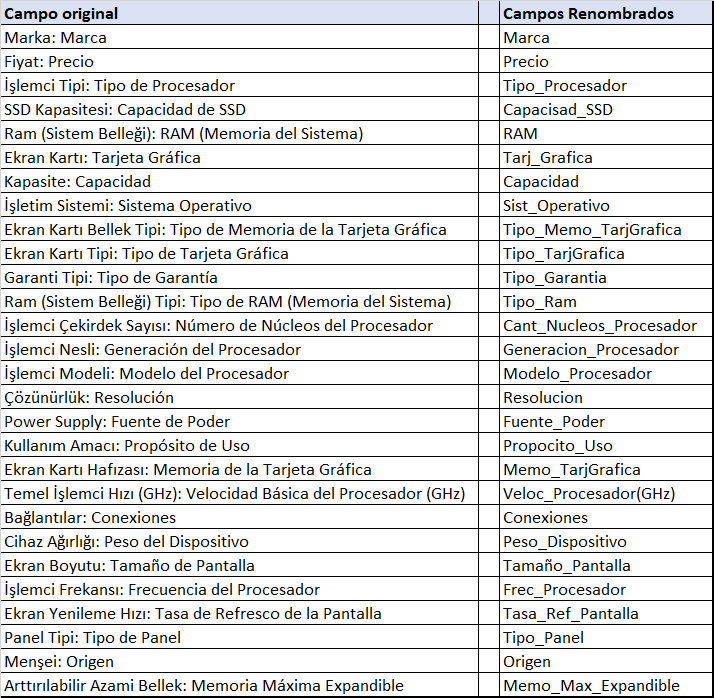

### C. Renombre de Variables

In [ ]:
df.columns.tolist()

In [ ]:
#Para una mayor comprension del dataset, se procedio a traducir el nombre de cada campo al español (se uso IA)

df.rename(columns={
    'Marka': 'Marca',
    'Fiyat': 'Precio',
    'İşlemci Tipi':'Tipo_Procesador',
    'SSD Kapasitesi': 'Capacidad_SSD',
    'Ram (Sistem Belleği)': 'RAM',
    'Ekran Kartı': 'Tarj_Grafica',
    'Kapasite': 'Capacidad',
    'İşletim Sistemi': 'Sist_Operativo',
    'Ekran Kartı Bellek Tipi':'Tipo_Memo_TarjGrafica',
    'Ekran Kartı Tipi':'Tipo_TarjGrafica',
    'Garanti Tipi': 'Tipo_Garantia',
    'Ram (Sistem Belleği) Tipi' : 'Tipo_Ram',
    'İşlemci Çekirdek Sayısı': 'Cant_Nucleos_Procesador',
    'İşlemci Nesli': 'Generacion_Procesador',
    'İşlemci Modeli':'Modelo_Procesador',
    'Çözünürlük':'Resolucion',
    'Power Supply':'Fuente_Poder',
    'Kullanım Amacı':'Proposito_Uso',
    'Ekran Kartı Hafızası':'Memo_TarjGrafica',
    'Temel İşlemci Hızı (GHz)':'Veloc_Procesador(GHz)',
    'Bağlantılar':'Conexiones',
    'Cihaz Ağırlığı':'Peso_Dispositivo',
    'Ekran Boyutu':'Tamaño_Pantalla',
    'İşlemci Frekansı':'Frec_Procesador',
    'Ekran Yenileme Hızı':'Tasa_Ref_Pantalla',
    'Panel Tipi':'Tipo_Panel',
    'Menşei':'Origen',
    'Arttırılabilir Azami Bellek':'Memo_Max_Expandible'
}, inplace=True)

df

### D. Eliminacion de duplicados

In [ ]:
# Muestra la cantidad de registros duplicados

duplicados = df.duplicated()
print(f"Duplicados  encontrados: {duplicados.sum()}")

In [ ]:
# Elimina los registro duplicados

df = df.drop_duplicates()
print(f"Data despues de eliminar duplicados: {len(df)} filas")

### E. Análisis de datos faltantes por columnas

In [ ]:
#Muestra la cantidad de NULL que presenta cada columna, ordenados en orden ascendente

df.isnull().sum().sort_values(ascending=True)

In [ ]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando las columnas que deseas mostrar
columns_to_plot = [
    'Marca', 'Precio', 'Tipo_Procesador', 'Capacidad_SSD',
    'RAM', 'Tarj_Grafica', 'Capacidad', 'Sist_Operativo',
    'Tipo_Memo_TarjGrafica', 'Tipo_TarjGrafica', 'Tipo_Garantia',
    'Tipo_Ram', 'Cant_Nucleos_Procesador', 'Generacion_Procesador',
    'Modelo_Procesador', 'Resolucion', 'Fuente_Poder',
    'Proposito_Uso', 'Memo_TarjGrafica', 'Veloc_Procesador(GHz)',
    'Conexiones', 'Peso_Dispositivo', 'Tamaño_Pantalla',
    'Frec_Procesador', 'Tasa_Ref_Pantalla', 'Tipo_Panel',
    'Origen', 'Memo_Max_Expandible'
]

# Filtra las cuentas de nulos para las columnas específicas
null_counts_filtered = null_counts[columns_to_plot]

# Grafica
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Ajusta los límites del eje x para que reflejen el total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

En este grafico de barras se puede observar de una manera visual, la insidencia de valores nulos en cada variable del dataframe.

In [ ]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando solo las columnas que tienen más del 50% de nulos
threshold = total_records * 0.5
null_counts_filtered = null_counts[null_counts > threshold]

# Grafico
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Establecer el límite del eje y igual al total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna (Más del 50% de Nulos)')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

# Añadiendo el número de nulos sobre cada barra
for i in range(len(null_counts_filtered)):
    ax.text(i, null_counts_filtered.iloc[i] + 0.1, f'{null_counts_filtered.iloc[i]}', ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




De acuerdo a lo encontrado en el grafico podemos considerar lo siguiente se podrian eliminar las columnas origen, tipo_panel, tasa_ref_pantalla, frec_procesador, fuente_poder, peso_Dispositivo por el alto numero de valores nulos que presentan estas columnas

####  Eliminacion de Variables

In [ ]:
# se eliminaran las columnas con un alto nivel de valores nulos   "NOTA PARA TENER EN CUENTA: JUSTIFICAR EL PORQUE SE ELIMINA CADA CAMPO"
# Eliminar las columnas especificadas
columns_to_remove = [
    'Fuente_Poder',
    'Peso_Dispositivo',
    'Tamaño_Pantalla',
    'Frec_Procesador',
    'Tasa_Ref_Pantalla',
    'Tipo_Panel',
    'Origen'
]

df.drop(columns=columns_to_remove, inplace=True)

# Verificación de las columnas restantes en el DataFrame


### F. Análisis de datos faltantes por Filas

In [ ]:
# gráfico de calor que muestre visualmente la presencia de valores nulos en tu DataFrame
#Crear un DataFrame que marque los valores nulos como True
null_heatmap = df.isnull()

# Crear el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Índices de Registros')
plt.xticks(ticks=np.arange(len(null_heatmap.columns)) + 0.5, labels=null_heatmap.columns, rotation=45)
plt.show()

In [ ]:
# Se muestra los registros a traves de sus indeces que mas valores nulos presentan, ordenados de forma descendente

df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

In [ ]:
# Muestra los registros que tienen  16 o mas campos con valores nulos
df[df.isnull().sum(axis=1) >=16].reset_index()

#### Eliminacion de Registros con un alto indice de valores nulos.

In [ ]:
# Se procede a eliminar los registros con un alto indice de valores nulos en sus columnas (condicion de eliminacion 16 o mas columnas vacias)

df.drop(index=df[df.isnull().sum(axis=1) >=16].index, inplace=True)

Una Vez que se identifico las filas y columnas con un alto grado de nuevos, se procedio a eliminarlas. Ahora el proximo paso es evaluar las columnas restantes y definir una metodologia para tratar los valores nulos de las mismas.

# 5- Análisis exploratorio de los datos

### 5.A Análisis Univariado

### 5.B Análisis Bivariado

### 5.C Análisis Multivariado